In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [9]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
print(df.landmass.value_counts())

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64


In [10]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df["landmass"].isin([3,6])]

#Print the average vales of the predictors for Europe and Oceania
print(df_36.groupby('landmass')[var].mean().T)

landmass         3     6
red       0.828571  0.80
green     0.200000  0.20
blue      0.514286  0.80
gold      0.428571  0.60
white     0.771429  0.95
black     0.171429  0.15
orange    0.057143  0.15
bars      0.628571  0.00
stripes   1.285714  0.40
circles   0.028571  0.15
crosses   0.285714  0.40
saltires  0.028571  0.30
quarters  0.028571  0.40
sunstars  0.142857  3.30
triangle  0.028571  0.25
animate   0.114286  0.30


In [11]:
#Create labels for only Europe and Oceania
labels = df_36["landmass"]

#Print the variable types for the predictors
print(df[var].dtypes)


red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


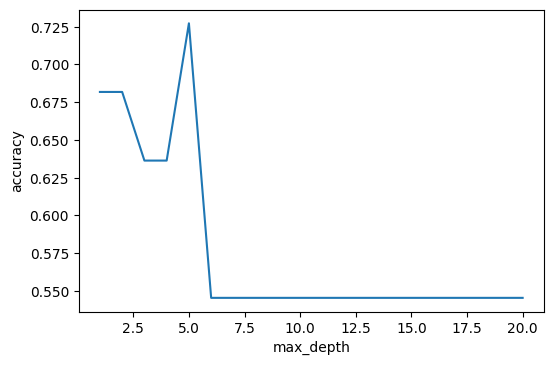

In [12]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

#Split data into a train and test set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()



Highest accuracy 72.7% at depth 5


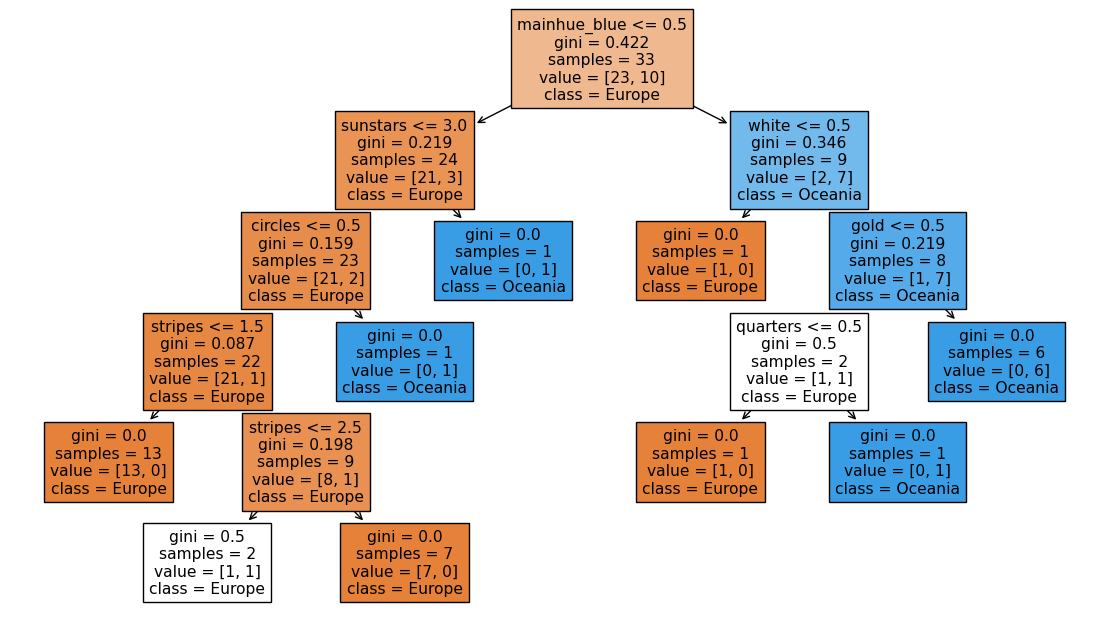

In [13]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print('Highest accuracy {}% at depth {}'.format(round(max_acc,3)*100,best_depth))

#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()


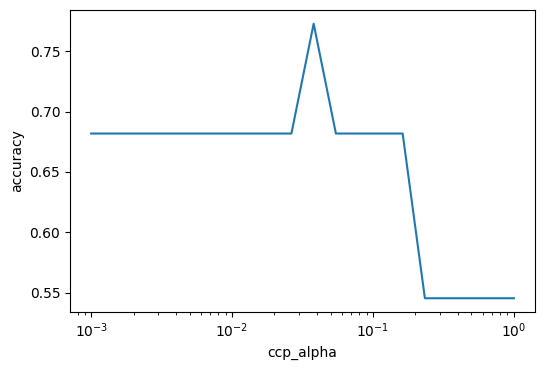

In [15]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(train_data, train_labels)
    acc_pruned.append(dt_prune.score(test_data, test_labels))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()


Highest accuracy 77.3% at ccp_alpha 0.0379


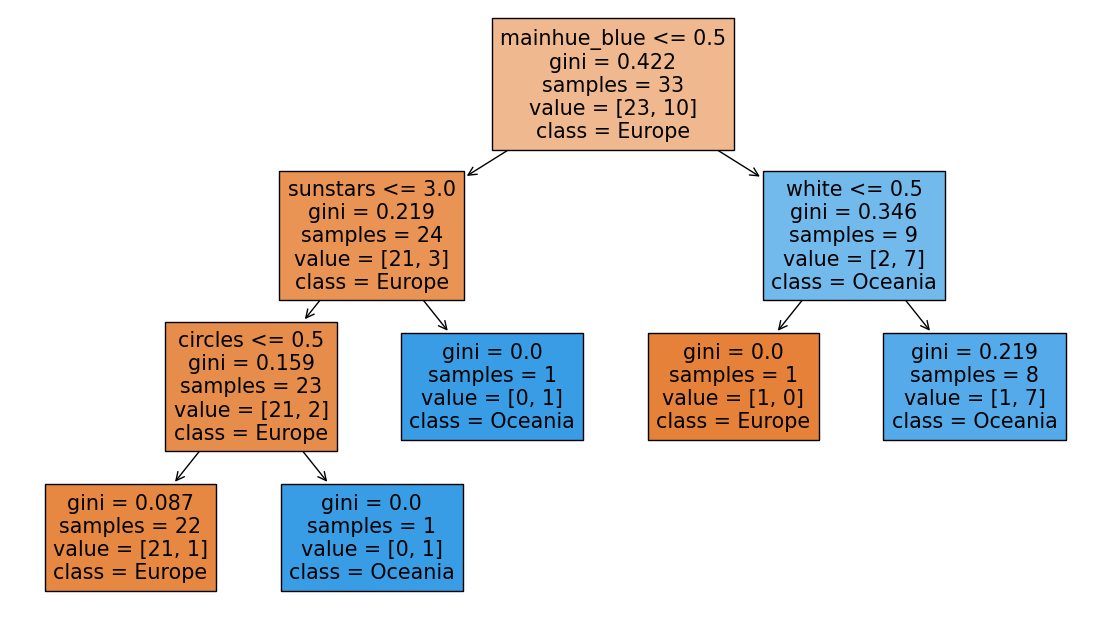

In [16]:
#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print('Highest accuracy {}% at ccp_alpha {}'.format(round(max_acc_pruned,3)*100,round(best_ccp,4)))

#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp)
dt_final.fit(train_data, train_labels)

#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt_final, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()